In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import calendar as cal

# Анализ метеонаблюдений от Королевского нидерландского метеорологического института (KNMI) за последние 100 лет (1920 — 2020 гг.)

В данном проекте используется [набор данных](https://www.kaggle.com/davidzaccai/knmi-19012020-historical-weather-data) наблюдений за погодой от Королевского нидерландского метеорологического института ([Koninklijk Nederlands Meteorologisch Instituut — KNMI](https://www.knmi.nl/)) с более чем столетними измерениями, начиная с 1901 года! Наблюдения производились метеостанцией в Де-Билт (De Bilt), где находится штаб-квартира KNMI, и охватывают данные о температуре, ветре, относительной влажности, облачности, осадках, испарении, продолжительности солнечного сияния и атмосферном давлении.

In [2]:
# прочитать заголовок
header = tuple(np.loadtxt("KNMI_20200710.csv", dtype=str, delimiter = ',', max_rows=1))
print(header)

('STN', 'YYYYMMDD', 'DDVEC', 'FHVEC', 'FG', 'FHX', 'FHXH', 'FHN', 'FHNH', 'FXX', 'FXXH', 'TG', 'TN', 'TNH', 'TX', 'TXH', 'T10N', 'T10NH', 'SQ', 'SP', 'Q', 'DR', 'RH', 'RHX', 'RHXH', 'PG', 'PX', 'PXH', 'PN', 'PNH', 'VVN', 'VVNH', 'VVX', 'VVXH', 'NG', 'UG', 'UX', 'UXH', 'UN', 'UNH', 'EV24')


| Столбец | Описание | Примечание |
|:---:|:---|:---:|
| STN | Номер станции | 260 = De Bilt, NL |
| YYYYMMDD | Дата | YYYY=год, MM=месяц, DD=день |
| DDVEC | Направление ветра (в градусах) | 360=север, 90=восток, 180=юг, 270=запад, 0=штиль |
| FHVEC | Скорость ветра: среднее значение вектора | [км/ч] |
| FG | Скорость ветра: среднее за 24 часа | [км/ч] |
| FHX | Скорость ветра: наивысшее среднечасовое значение | [км/ч] |
| FHXH | Скорость ветра: метка времени (час измерения) FHX | [0-23] |
| FHN | Скорость ветра: наименьшее среднечасовое значение | [км/ч] |
| FHNH | Скорость ветра: метка времени (час измерения) FHN | [0-23] |
| FXX | Скорость ветра: максимальный порыв ветра | [км/ч] |
| FXXH | Скорость ветра: метка времени (час измерения) FXX | [0-23] |
| TG | Температура: среднее за 24 часа | [℃] |
| TN | Температура: минимум | [℃] |
| TNH | Температура: метка времени (час измерения) TN | [0-23] |
| TX | Температура: максимум | [℃] |
| TXH | Температура: метка времени (час измерения) TX | [0-23] |
| T10N | Температура: минимальная температура на высоте 10 см над уровнем земли | [℃] |
| T10NH | Температура: метка времени (час измерения) T10N | [0-23] |
| SQ | Продолжительность солнечного света, рассчитанная с использованием глобального излучения | [ч] |
| SP | Процент продолжительности солнечного света по отношению к максимально возможному дневному солнечному свету | [0-100] |
| Q | Глобальное излучение | [Дж/см2] |
| DR | Осадки: продолжительность | [ч] |
| RH | Осадки: суммарное за 24 часа | [мм] |
| RHX | Осадки: максимум за час | [мм] |
| RHXH | Осадки: метка времени (час измерения) RHX | [0-23] |
| PG | Атмосферное давление (пониженное до уровня моря): среднее за 24 ч | [даПа] |
| PX | Атмосферное давление (пониженное до уровня моря): максимум | [даПа] |
| PXH | Атмосферное давление (пониженное до уровня моря): метка времени (час измерения) PX | [0-23] |
| PN | Атмосферное давление (пониженное до уровня моря): минимум | [даПа] |
| PNH | Атмосферное давление (пониженное до уровня моря): метка времени (час измерения) PN | [0-23] |
| VVN | Видимость: минимум | 0: <100 m, 1:100-200 m, 2:200-300 m, 49:4900-5000 m, 50:5-6 km, 56:6-7 km, 57:7-8 km, 79:29-30 km, 80:30-35 km, 81:35-40 km, 89: >70 km |
| VVNH | Видимость: метка времени (час измерения) VVN | [0-23] |
| VVX | Видимость: максимум | 0: <100 m, 1:100-200 m, 2:200-300 m, 49:4900-5000 m, 50:5-6 km, 56:6-7 km, 57:7-8 km, 79:29-30 km, 80:30-35 km, 81:35-40 km, 89: >70 km |
| VVXH | Видимость: метка времени (час измерения) VVX | [0-23] |
| NG | Облачность: среднее за 24 часа | [0-8] (0 = небо ясное, 8 = небо закрыто) |
| UG | Относительная влажность: среднее за 24 часа | [%] |
| UX | Относительная влажность: максимум | [%] |
| UXH | Относительная влажность: метка времени (час измерения) UX | [0-23] |
| UN | Относительная влажность: минимум | [%] |
| UNH | Относительная влажность: метка времени (час измерения) UN | [0-23] |
| EV24 | Испарение Маккинка | [мм] |

In [3]:
str2float = lambda s: float(s.strip() or 0)  # заменить отсутствующие данные нулём
str2int = lambda s: int(s.strip() or 0)  # заменить отсутствующие данные нулём

casts = {i: str2float for i in range(len(header))}
formats = ['f4' for i in range(len(header))]

for cln in header:
    if (cln == 'STN'):
        i = header.index(cln)
        casts[i] = str2int
        formats[i] = 'i4'
    elif (cln == 'YYYYMMDD'):
        i = header.index(cln)
        casts[i] = str2int
        formats[i] = 'i4'
    elif (cln.endswith('H')):
        i = header.index(cln)
        casts[i] = str2int
        formats[i] = 'i1'

# загрузить данные
data = np.loadtxt("KNMI_20200710.csv", delimiter = ',', skiprows=1, converters=casts,
                  dtype={'names': header, 'formats': formats})

Рассмотрим среднесуточное давление на уровне моря (в 0,1 гПа), рассчитанное на основе 24-часовых значений. Это включает в себя печать описательной статистики и визуализацию распределения вероятностей. В природе мы часто имеем дело с нормальным распределением, поэтому нам пригодится проверка гипотезы о нормальном законе распределения генеральной совокупности. 

In [4]:
# получить средние значения атмосферного давления и перевести их в гПа умножением на 0.1
meanp = np.array([0.1 * rec[header.index("PG")] for rec in data])

# отфильтровать нулевые значения
meanp = meanp[meanp > 0]

In [5]:
# описательная статистика для атмосферного давления
mean = meanp.mean()
std = meanp.std()

print("Максимум:\t\t", meanp.max())
print("Минимум:\t\t", meanp.min())
print("Выборочное среднее:\t", mean)
print("Медиана:\t\t", np.median(meanp))
print("Mода:\t\t\t", stats.mode(meanp, axis=None))
print("Стандартное отклонение:\t", std)

Максимум:		 1048.3
Минимум:		 962.1
Выборочное среднее:	 1015.1654685731446
Медиана:		 1015.8000000000001
Mода:			 ModeResult(mode=array([1017.7]), count=array([217]))
Стандартное отклонение:	 9.845134821605363


Text(0, 0.5, 'Частота')

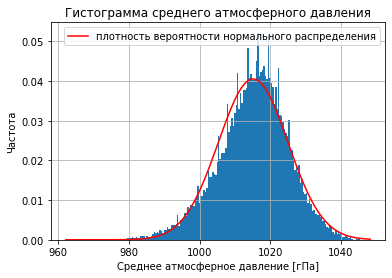

In [6]:
# гистограмма выборки и плотность вероятности нормального распределения
plt.title("Гистограмма среднего атмосферного давления")
_, bins, _ = plt.hist(meanp, int(np.sqrt(len(meanp))), density=True)  # normed=True
bbb = np.array([1/(std * np.sqrt(2 * np.pi)) * np.exp(- (b - mean)**2/(2 * std**2)) for b in bins])
plt.plot(bins, bbb, 'r-', label="плотность вероятности нормального распределения")
plt.grid()
plt.legend(loc='best')
plt.xlabel("Среднее атмосферное давление [гПа]")
plt.ylabel("Частота")

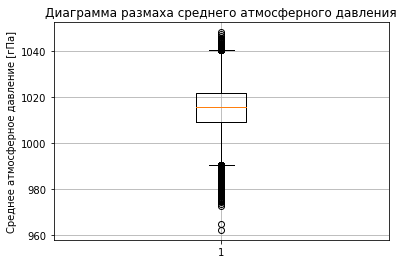

In [7]:
# "ящик с усами"
plt.boxplot(meanp)
plt.title("Диаграмма размаха среднего атмосферного давления")
plt.ylabel("Среднее атмосферное давление [гПа]")
plt.grid()

Дневной диапазон давления — это разница дневных максимумов и минимумов. В реальных данных иногда отсутствуют некоторые значения. В данном случае это значения для высокого и/или низкого давления в данный день. Можно восполнить эти пробелы с помощью умного алгоритма (интерполировать). Однако можно сделать проще и просто их проигнорировать. После вычисления диапазонов мы проведём аналогичный анализ, как в ячейках выше, но мы будем использовать функции, которые могут работать со значениями NaN. Также мы рассмотрим связь между месяцами и диапазонами.

In [8]:
# получить значения атмосферного давления и перевести их в гПа умножением на 0.1
highs = np.array([0.1 * rec[header.index("PX")] for rec in data]).astype(float)
lows = np.array([0.1 * rec[header.index("PN")] for rec in data]).astype(float)

# отфильтровать нулевые значения (заменить на NaN)
highs[highs == 0] = np.nan
lows[lows == 0] = np.nan

In [9]:
# вычислить диапазон и статистику
ranges = highs - lows
print("Минимум суточного диапазона  :", np.nanmin(ranges))
print("Максимум суточного диапазона :", np.nanmax(ranges))
print("Среднее суточного диапазона  :", np.nanmean(ranges))
print("Стандартное отклонение:", np.nanstd(ranges))

Минимум суточного диапазона  : 0.40000000000009095
Максимум суточного диапазона : 41.69999999999993
Среднее суточного диапазона  : 6.124495264495265
Стандартное отклонение: 4.413000139268925


In [10]:
# получить статистику по месяцам
dates = np.array([rec[header.index("YYYYMMDD")] for rec in data])
months = (dates % 10000) // 100
months = months[~np.isnan(ranges)]  # игнорировать NaN-значения

monthly = []
month_range = np.arange(1, 13)

for month in month_range:
    indices = np.where(month == months)
    monthly.append(np.nanmean(ranges[indices]))

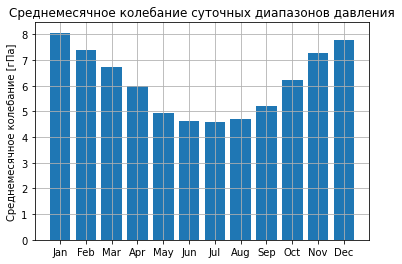

In [11]:
# гистограмма среднемесячных колебаний суточных диапазонов давления
plt.bar(month_range, monthly)
plt.title("Среднемесячное колебание суточных диапазонов давления")
plt.xticks(month_range, cal.month_abbr[1:13])
plt.ylabel("Среднемесячное колебание [гПа]")
plt.grid()